# Preparation

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv('bank-full.csv', sep = ";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Pre-processing

In [ ]:
#Missing Value
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.duplicated().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Hapus data yg ga dibutuhin
data.drop(columns =['contact', 'day','previous','duration','campaign','pdays','month', 'poutcome'], inplace = True)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,yes
45207,71,retired,divorced,primary,no,1729,no,no,yes
45208,72,retired,married,secondary,no,5715,no,no,yes
45209,57,blue-collar,married,secondary,no,668,no,no,no


In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<ipython-input-45-48d21e517e7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], kde = True)


<Axes: xlabel='age', ylabel='Density'>

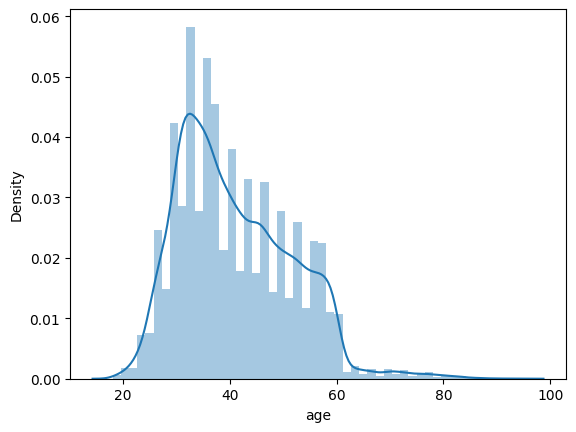

In [ ]:
sns.distplot(data['age'], kde = True)

In [ ]:
# Age discretization
bins = [17, 26, 46, float('inf')]  # Carry out simplified categories based on the Ministry of Health
labels = ['young', 'middle', 'senior']

# Discretization of the variable 'age' with predetermined category boundaries
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,y
0,senior,management,married,tertiary,no,2143,yes,no,no
1,middle,technician,single,secondary,no,29,yes,no,no
2,middle,entrepreneur,married,secondary,no,2,yes,yes,no
3,senior,blue-collar,married,unknown,no,1506,yes,no,no
4,middle,unknown,single,unknown,no,1,no,no,no
...,...,...,...,...,...,...,...,...,...
45206,senior,technician,married,tertiary,no,825,no,no,yes
45207,senior,retired,divorced,primary,no,1729,no,no,yes
45208,senior,retired,married,secondary,no,5715,no,no,yes
45209,senior,blue-collar,married,secondary,no,668,no,no,no


# Data Encoding

In [ ]:
# Label Encoding for all categorical columns except Age
encod = ['y', 'marital', 'default', 'housing', 'loan', 'education', 'job']

label_encoder = LabelEncoder()

for i in encod:
  data[i] = label_encoder.fit_transform(data[i])

data

,age,job,marital,education,default,balance,housing,loan,y
0,senior,4,1,2,0,2143,1,0,0
1,middle,9,2,1,0,29,1,0,0
2,middle,2,1,1,0,2,1,1,0
3,senior,1,1,3,0,1506,1,0,0
4,middle,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,senior,9,1,2,0,825,0,0,1
45207,senior,5,0,0,0,1729,0,0,1
45208,senior,5,1,1,0,5715,0,0,1
45209,senior,1,1,1,0,668,0,0,0


In [ ]:
data['age'].unique()

['senior', 'middle', 'young']
Categories (3, object): ['young' < 'middle' < 'senior']

In [ ]:
# Ordinal encoding for Age
ordinal_encoder = OrdinalEncoder(categories=[['young', 'middle', 'senior']])

data['age'] = ordinal_encoder.fit_transform(data[['age']])
data

,age,job,marital,education,default,balance,housing,loan,y
0,2.0,4,1,2,0,2143,1,0,0
1,1.0,9,2,1,0,29,1,0,0
2,1.0,2,1,1,0,2,1,1,0
3,2.0,1,1,3,0,1506,1,0,0
4,1.0,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,2.0,9,1,2,0,825,0,0,1
45207,2.0,5,0,0,0,1729,0,0,1
45208,2.0,5,1,1,0,5715,0,0,1
45209,2.0,1,1,1,0,668,0,0,0


<Axes: >

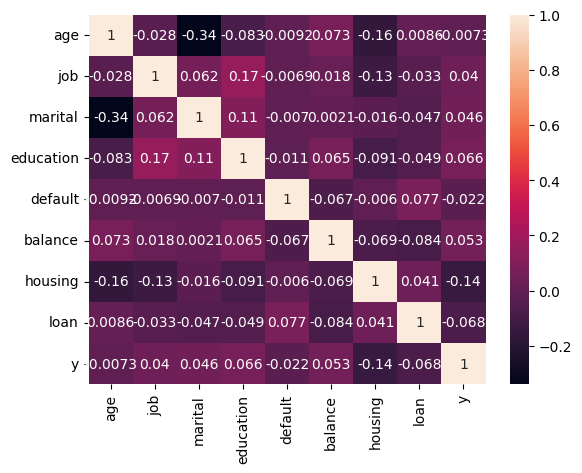

In [ ]:
data.corr()
sns.heatmap(data.corr(), annot = True)

# Classification Modeling

In [ ]:
X = data.drop(columns = ['y'])
X

,age,job,marital,education,default,balance,housing,loan
0,2.0,4,1,2,0,2143,1,0
1,1.0,9,2,1,0,29,1,0
2,1.0,2,1,1,0,2,1,1
3,2.0,1,1,3,0,1506,1,0
4,1.0,11,2,3,0,1,0,0
...,...,...,...,...,...,...,...,...
45206,2.0,9,1,2,0,825,0,0
45207,2.0,5,0,0,0,1729,0,0
45208,2.0,5,1,1,0,5715,0,0
45209,2.0,1,1,1,0,668,0,0


In [ ]:
y = data['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
# Lists of Metrics and Models

list_of_metric = [
    'accuracy',
    'f1',
    'recall',
    'precision',
    'roc_auc',
    'neg_log_loss',
    'f1_weighted'
]

list_of_model = [
    LogisticRegression(max_iter = 1000),
    LogisticRegressionCV(max_iter = 10000),
    GradientBoostingClassifier(random_state = 26),
    HistGradientBoostingClassifier(random_state = 26),
    CatBoostClassifier(random_state = 26, logging_level = 'Silent'),
    XGBClassifier(random_state = 26),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), QuadraticDiscriminantAnalysis()
]

In [ ]:
# Create a function to evaluate all models automatically

def all_model(list_model, X, y, test_size = 0.2, random_state = None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    result = []
    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        hasil = {
            'Model' : type(model).__name__,
            'Accuracy' : accuracy,
            'F1 Score' : f1,
            'Precision' : precision,
            'Recall' : recall
        }

        result.append(hasil)

    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all


In [ ]:
all_listed_model = all_model(list_of_model, X, y, test_size = 0.2)
all_listed_model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.883888,0.001901,0.333333,0.000953
1,LogisticRegressionCV,0.883999,0.001903,0.500000,0.000953
2,GradientBoostingClassifier,0.884330,0.007590,0.800000,0.003813
3,HistGradientBoostingClassifier,0.884109,0.007576,0.571429,0.003813
4,CatBoostClassifier,0.883999,0.043756,0.500000,0.022879
5,XGBClassifier,0.884330,0.064401,0.521739,0.034318
6,BernoulliNB,0.883999,0.000000,0.000000,0.000000
7,GaussianNB,0.871392,0.055240,0.186813,0.032412
8,KNeighborsClassifier,0.870729,0.139809,0.306452,0.090562
9,SVC,0.884109,0.001905,1.000000,0.000953
